In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer



import pickle


In [2]:
df = pd.read_csv('clean_loan.csv')
df.columns = df.columns.str.lower()
df.columns
df

,loan_amnt,funded_amnt,revol_bal,policy_code,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,initial_list_status,application_type
0,2500,2500,4341,1,2500.0,13.56,84.92,55000.0,18.24,0.0,...,36 months,C,10+ years,RENT,Not Verified,Current,n,debt_consolidation,w,Individual
1,30000,30000,12315,1,30000.0,18.94,777.23,90000.0,26.52,0.0,...,60 months,D,10+ years,MORTGAGE,Source Verified,Current,n,debt_consolidation,w,Individual
2,5000,5000,4599,1,5000.0,17.97,180.69,59280.0,10.51,0.0,...,36 months,D,6 years,MORTGAGE,Source Verified,Current,n,debt_consolidation,w,Individual
3,4000,4000,5468,1,4000.0,18.94,146.51,92000.0,16.74,0.0,...,36 months,D,10+ years,MORTGAGE,Source Verified,Current,n,debt_consolidation,w,Individual
4,30000,30000,829,1,30000.0,16.14,731.78,57250.0,26.35,0.0,...,60 months,C,10+ years,MORTGAGE,Not Verified,Current,n,debt_consolidation,w,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652446,15000,15000,6988,1,15000.0,16.02,364.94,85000.0,14.66,0.0,...,60 months,C,< 1 year,RENT,Verified,Fully Paid,n,debt_consolidation,w,Individual
1652447,30000,30000,19206,1,30000.0,30.75,984.47,100000.0,22.13,0.0,...,60 months,F,6 years,MORTGAGE,Verified,Current,n,debt_consolidation,f,Individual
1652448,12000,12000,9592,1,12000.0,14.08,279.72,58000.0,20.88,0.0,...,60 months,C,10+ years,MORTGAGE,Not Verified,Current,n,debt_consolidation,w,Individual
1652449,12000,12000,3497,1,12000.0,25.82,358.01,30000.0,19.28,3.0,...,60 months,E,< 1 year,MORTGAGE,Not Verified,Fully Paid,n,debt_consolidation,w,Joint App


In [34]:
df_grade = df
df_grade

,loan_amnt,funded_amnt,revol_bal,policy_code,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,initial_list_status,application_type
0,2500,2500,4341,1,2500.0,13.56,84.92,55000.0,18.24,0.0,...,36 months,2,10+ years,RENT,Not Verified,Current,n,debt_consolidation,w,Individual
1,30000,30000,12315,1,30000.0,18.94,777.23,90000.0,26.52,0.0,...,60 months,3,10+ years,MORTGAGE,Source Verified,Current,n,debt_consolidation,w,Individual
2,5000,5000,4599,1,5000.0,17.97,180.69,59280.0,10.51,0.0,...,36 months,3,6 years,MORTGAGE,Source Verified,Current,n,debt_consolidation,w,Individual
3,4000,4000,5468,1,4000.0,18.94,146.51,92000.0,16.74,0.0,...,36 months,3,10+ years,MORTGAGE,Source Verified,Current,n,debt_consolidation,w,Individual
4,30000,30000,829,1,30000.0,16.14,731.78,57250.0,26.35,0.0,...,60 months,2,10+ years,MORTGAGE,Not Verified,Current,n,debt_consolidation,w,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652446,15000,15000,6988,1,15000.0,16.02,364.94,85000.0,14.66,0.0,...,60 months,2,< 1 year,RENT,Verified,Fully Paid,n,debt_consolidation,w,Individual
1652447,30000,30000,19206,1,30000.0,30.75,984.47,100000.0,22.13,0.0,...,60 months,5,6 years,MORTGAGE,Verified,Current,n,debt_consolidation,f,Individual
1652448,12000,12000,9592,1,12000.0,14.08,279.72,58000.0,20.88,0.0,...,60 months,2,10+ years,MORTGAGE,Not Verified,Current,n,debt_consolidation,w,Individual
1652449,12000,12000,3497,1,12000.0,25.82,358.01,30000.0,19.28,3.0,...,60 months,4,< 1 year,MORTGAGE,Not Verified,Fully Paid,n,debt_consolidation,w,Joint App


In [4]:

df.shape
df.describe()

# check if there are any null values
df.isnull().sum()
# x_df = dataFrame.drop(columns = ['GRADE', 'INT_RATE'])
# y = dataFrame['GRADE']

loan_amnt              0
funded_amnt            0
revol_bal              0
policy_code            0
funded_amnt_inv        0
int_rate               0
installment            0
annual_inc             0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
out_prncp              0
out_prncp_inv          0
total_pymnt            0
total_pymnt_inv        0
term                   0
grade                  0
emp_length             0
home_ownership         0
verification_status    0
loan_status            0
pymnt_plan             0
purpose                0
initial_list_status    0
application_type       0
dtype: int64

In [5]:
df['grade'].value_counts()

C    484917
B    479341
A    304233
D    240922
E    101701
F     31886
G      9451
Name: grade, dtype: int64

In [6]:
#percentage of loans in each category

df['grade'].value_counts()/df.shape[0]*100

C    29.345318
B    29.007880
A    18.411015
D    14.579676
E     6.154555
F     1.929618
G     0.571938
Name: grade, dtype: float64

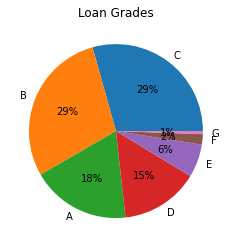

In [7]:
#plot to show the distrubution of the loans
labels = ['C', 'B', 'A', 'D', 'E', 'F', 'G']
values = df['grade'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Loan Grades')
plt.show()

In [35]:
#modify the data so that the loan grades are numeric 

# df_grade = df.loc[(df.grade == 'A'), 'grade'] = 0
# df_grade = df.loc[(df.grade == 'B'), 'grade'] = 1
# df_grade = df.loc[(df.grade == 'C'), 'grade'] = 2
# df_grade = df.loc[(df.grade == 'D'), 'grade'] = 3
# df_grade = df.loc[(df.grade == 'E'), 'grade'] = 4
# df_grade = df.loc[(df.grade == 'F'), 'grade'] = 5
# df_grade = df.loc[(df.grade == 'G'), 'grade'] = 6

# df_grade['grade'] = np.where((df_grade == 'A'), 0, df_grade.grade)

# df_grade

df_grade = df_grade.drop(['verification_status', 'emp_length', 'dti', 'term', 'open_acc', 'pub_rec', 'loan_status', 'pymnt_plan', 'purpose', 'initial_list_status','application_type', 'policy_code', 'funded_amnt', 'home_ownership', 'funded_amnt_inv', 'revol_bal'], axis = 1)







In [36]:
df_grade['grade'] = df_grade['grade'].astype(str).astype(int)

In [37]:
df_grade


,loan_amnt,int_rate,installment,annual_inc,delinq_2yrs,inq_last_6mths,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,grade
0,2500,13.56,84.92,55000.0,0.0,1.0,10.3,34.0,2386.02,2386.02,167.020000,167.02,2
1,30000,18.94,777.23,90000.0,0.0,0.0,24.2,44.0,29387.75,29387.75,1507.110000,1507.11,3
2,5000,17.97,180.69,59280.0,0.0,0.0,19.1,13.0,4787.21,4787.21,353.890000,353.89,3
3,4000,18.94,146.51,92000.0,0.0,0.0,78.1,13.0,3831.93,3831.93,286.710000,286.71,3
4,30000,16.14,731.78,57250.0,0.0,0.0,3.6,26.0,29339.02,29339.02,1423.210000,1423.21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652446,15000,16.02,364.94,85000.0,0.0,3.0,24.8,87.0,0.00,0.00,16112.317714,16112.32,2
1652447,30000,30.75,984.47,100000.0,0.0,2.0,66.9,14.0,25798.78,25798.78,15623.400000,15623.40,5
1652448,12000,14.08,279.72,58000.0,0.0,0.0,39.2,34.0,8687.20,8687.20,5360.960000,5360.96,2
1652449,12000,25.82,358.01,30000.0,3.0,1.0,20.2,26.0,0.00,0.00,14499.802172,14499.80,4


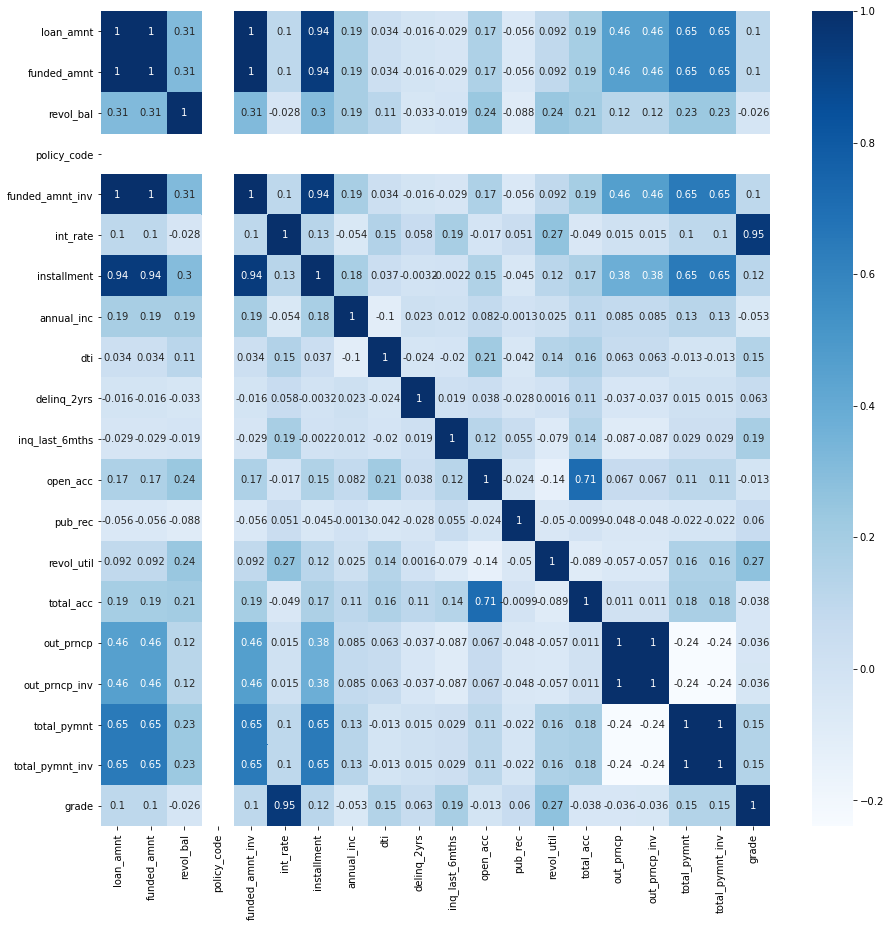

In [17]:
#creating correlation map

plt.figure(figsize=(15, 15))
sns.heatmap(df_grade.corr(), annot = True, cmap = "Blues")
plt.show()

In [ ]:
#the facors that are most correlated with the grade are interest rate, total payment, revol_util, inq last 6 months, and dti

sns.catplot(x = "int_rate", y = 'total_pymnt', hue = "grade", data = df_grade)
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()


In [45]:
#prep data for ML

grade = df_grade['grade']
features = df.drop(['grade'], axis =1 )

In [46]:
#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, df_grade, test_size = 0.2, random_state = 0)

In [47]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [48]:
# Initialize the models
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [sv, rf, ab, gb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

ValueError: could not convert string to float: ' 36 months'

In [43]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

-----



In [44]:
# get importance
importance = gb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Save the model as serialized object pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(gb, file)